----

### 베르누이분포와 이항분포

 - 베르누이 시행 (bernoulli trial) : 결과가 두가지로만 나오는 실험
 - 베르누이 확률변수 (bernoulli random variable) : 베르누이 시행의 결과값
  - 모든 확률변수의 결과값은 숫자이어야 한다. 
 
 - 베르누이 확률분포 : 베르누이 확률변수의 분포
 
     $X ~ Bern(x; \mu)$ : 확률변수 $X$가 베르누이분포를 따른다.
     
     - $x = 1, x = 0$
     
       $Bern(x; \mu) = \mu^x(1-\mu)^{(1-x)}$
         
     - $x = 1, x = -1$

       $Bern(x; \mu) = \mu^{(1+x)/2}(1-\mu)^{(1-x)/2}$
       
       
---
#### scipy를 사용한 베르누이 확률변수의 시뮬레이션

    - stats 서브 패키지 bernoulli 클래스

In [95]:
mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

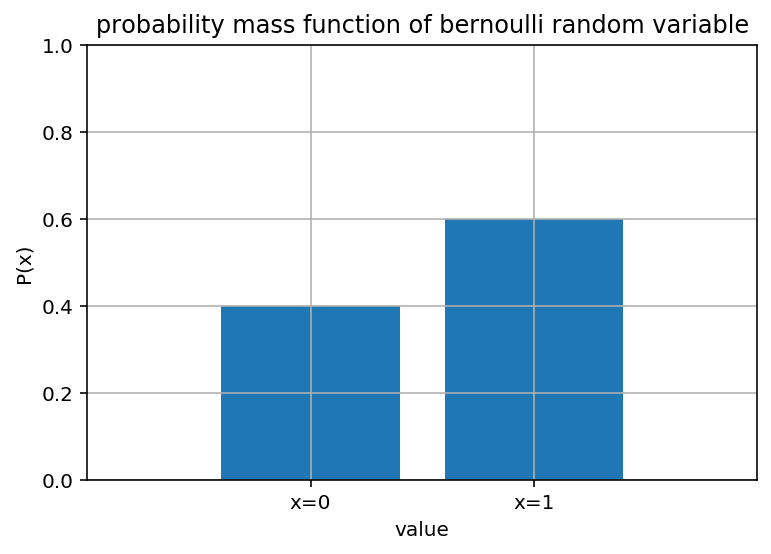

In [100]:
xx = [0, 1]

plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ['x=0', 'x=1'])
plt.xlabel("sample")
plt.ylabel("P(x)")
plt.title("probability mass function of bernoulli random variable")
plt.grid(True)
plt.show()

In [101]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

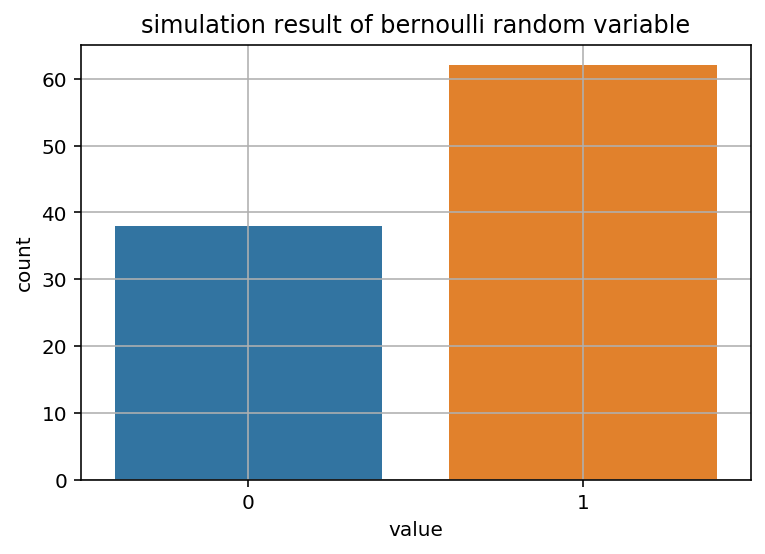

In [103]:
sns.countplot(x)
plt.title("simulation result of bernoulli random variable")
plt.xlabel("sample")
plt.grid()
plt.show()

In [104]:
y = np.bincount(x, minlength=2)/float(len(x))

df = pd.DataFrame({'summary': rv.pmf(xx), 'simulation': y})
df.index = [0, 1]
df

,summary,simulation
0,0.4,0.38
1,0.6,0.62


In [105]:
df2 = df.stack().reset_index()
df2.columns = ["sample", 'meaning', 'ratio']
df2

,sample,meaning,ratio
0,0,summary,0.40
1,0,simulation,0.38
2,1,summary,0.60
3,1,simulation,0.62


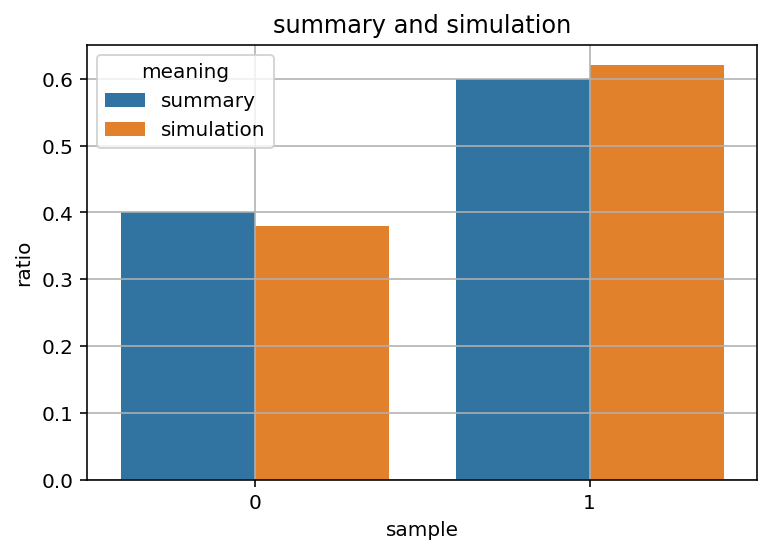

In [107]:
sns.barplot(x='sample', y='ratio', hue='meaning', data=df2)
plt.title("summary and simulation")
plt.grid()
plt.show()

#### 베르누이분포의 모멘트

 - 기대값
     
     $E[X] = \mu$
     
 - 분산
 
     $var[X] = \mu(1-\mu)$

In [108]:
np.mean(x)

0.62

In [109]:
np.var(x, ddof=1)

0.23797979797979804

In [111]:
s = sp.stats.describe(x)
s[2], s[3]

(0.62, 0.23797979797979804)

### 이항분포 (binomial distribution)

 - 베르누이 시행을 N번 반복하는 경우
 
     $X ~ Bin(x;N,\mu)$
     
 - 이항분포 확률변수 X의 확률질량함수
 
     $Y ~ bern(y; \mu)$


 - 이항분포 확률변수 X의 확률질량함수
 
     $bin(x;N,\mu) = (^N_x)\mu^x(1-\mu)^{N-x}$

In [162]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)
rv

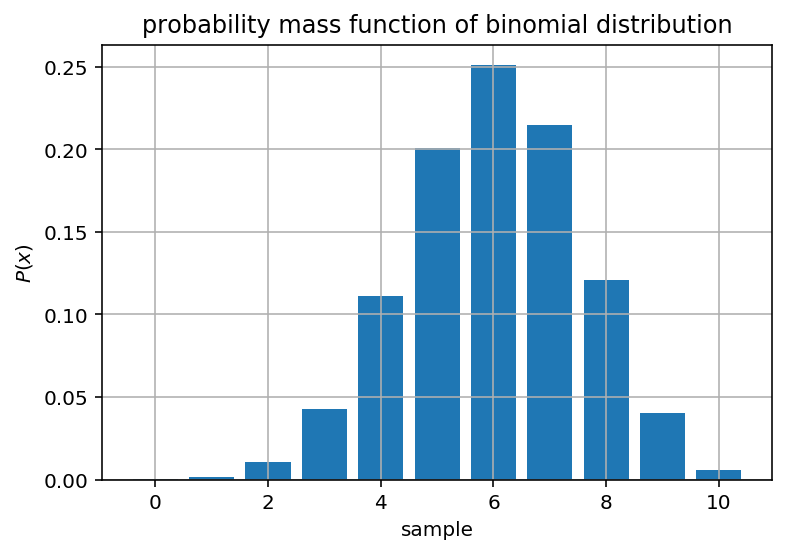

In [163]:
xx = np.arange(N+1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("sample")
plt.ylabel("$P(x)$")
plt.title("probability mass function of binomial distribution")
plt.grid()
plt.show()

# mu*N = mode의 위치

In [149]:
N = 10
mu = 0.9
rv = sp.stats.binom(N, mu)
rv

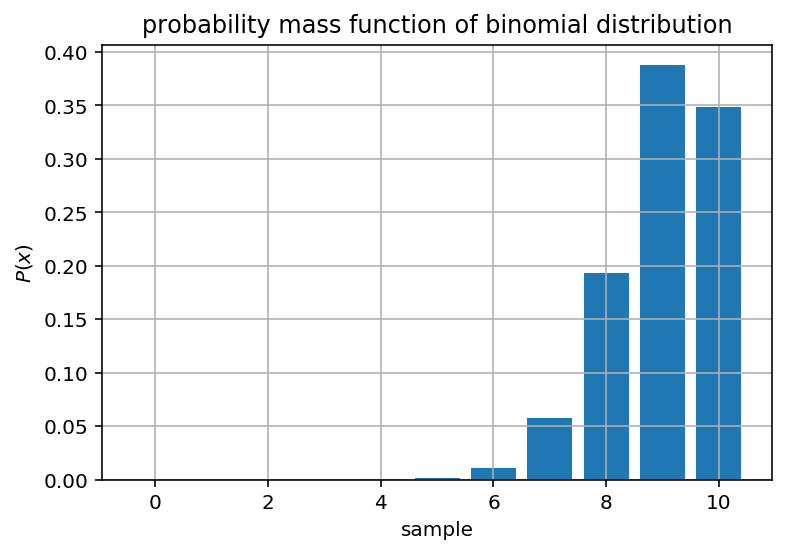

In [158]:
xx = np.arange(N+1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("sample")
plt.ylabel("$P(x)$")
plt.title("probability mass function of binomial distribution")
plt.grid()
plt.show()

In [164]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

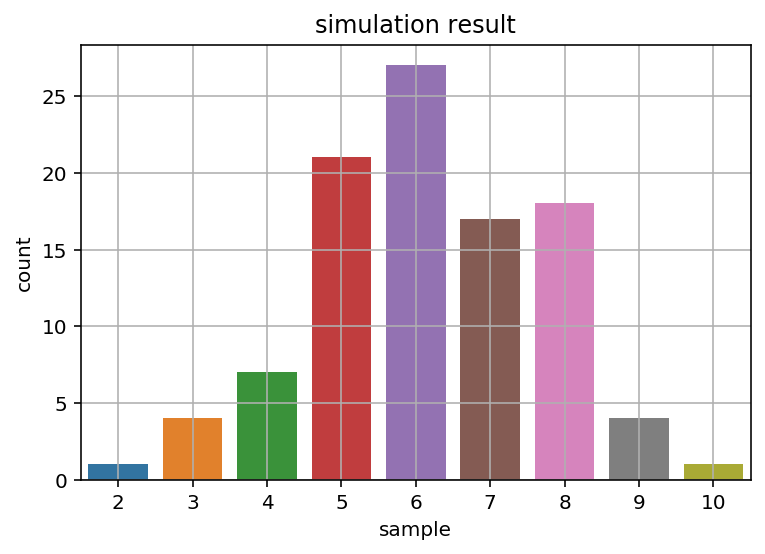

In [165]:
sns.countplot(x)
plt.title("simulation result")
plt.xlabel('sample')
plt.grid()
plt.show()

In [166]:
y = np.bincount(x, minlength=N+1)/float(len(x))

df = pd.DataFrame({"summary": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["sample", "meaning", 'ratio']
df.pivot("sample", "meaning", "ratio")
df

,sample,meaning,ratio
0,0,summary,0.000105
1,0,simulation,0.000000
2,1,summary,0.001573
3,1,simulation,0.000000
4,2,summary,0.010617
5,2,simulation,0.010000
6,3,summary,0.042467
7,3,simulation,0.040000
8,4,summary,0.111477
9,4,simulation,0.070000


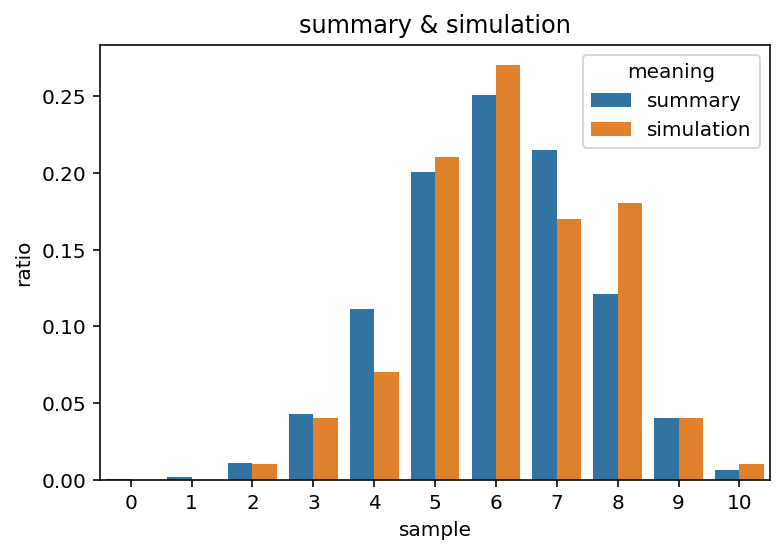

In [167]:
sns.barplot(x="sample", y="ratio", hue="meaning", data=df)
plt.title("summary & simulation")
plt.show()